In [2]:
## Machine Learning Project


**Idea** of this project is whether patient is getting stroke or not using some parameters like age,hypertension,heart_disease
gender,smoke,work_type,Residence_type,bmi_index,Married status.


In [3]:
import pandas as pd
import seaborn as sns

In [4]:
Data=pd.read_csv('/content/drive/MyDrive/ML_PROJECT/healthcare-dataset-stroke-data.csv')


In [5]:
Data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
Data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
Data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [9]:
Data['bmi'].fillna(Data['bmi'].median(),inplace=True)

<ipython-input-9-f707091978b1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data['bmi'].fillna(Data['bmi'].median(),inplace=True)


In [10]:
Data=Data.drop('id',axis=1)

In [11]:
import matplotlib.pyplot as plt

In [12]:
## Separte Numerical features and categorical features

In [13]:
Numerical_columns=Data.select_dtypes(include=['int64','float64']).columns
Categorical_columns=Data.select_dtypes(include=['object','category']).columns

In [14]:
numerical_df=Data[Numerical_columns]
categorical_df=Data[Categorical_columns]

In [15]:
## Histplot to understand the distribution

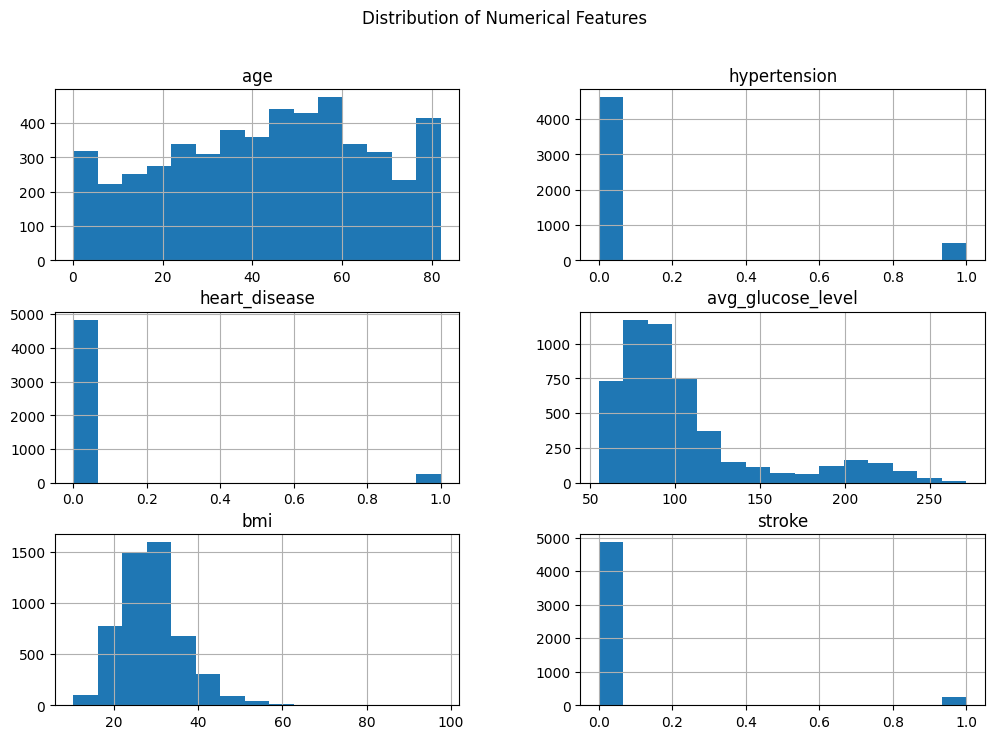

In [16]:
numerical_df.hist(bins=15,figsize=(12,8))
plt.suptitle("Distribution of Numerical Features")
plt.show()


In [17]:
## Boxplot to detecting Outliers.

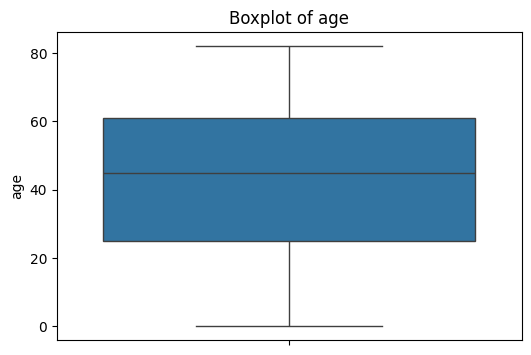

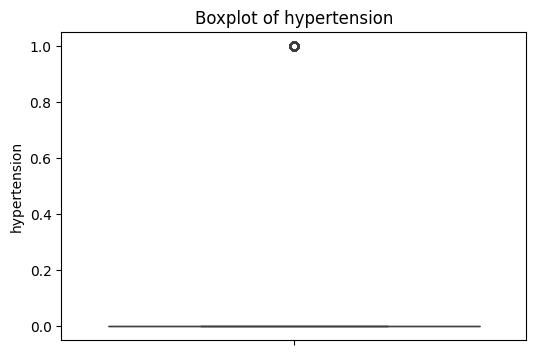

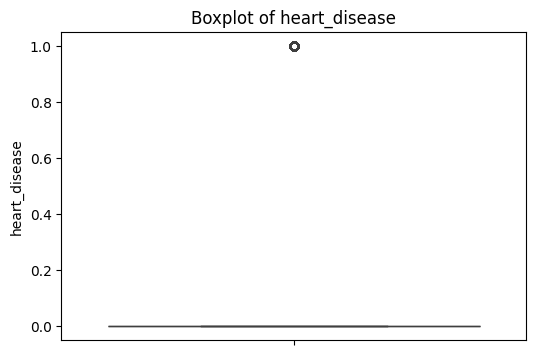

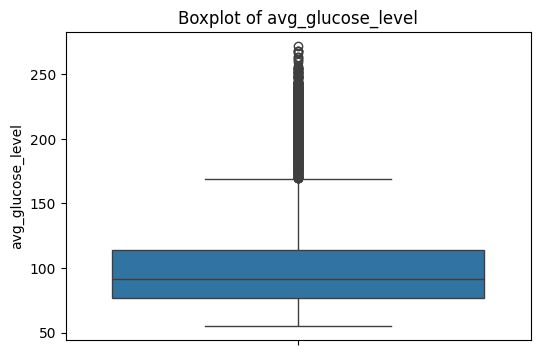

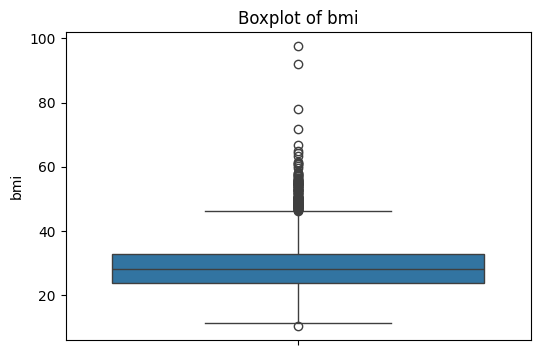

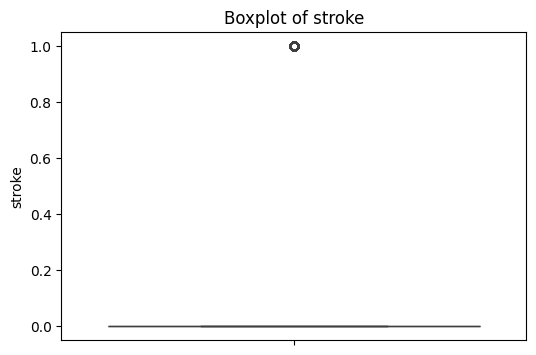

In [18]:
for column in numerical_df.columns:
  plt.figure(figsize=(6,4))
  sns.boxplot(y=numerical_df[column])
  plt.title(f"Boxplot of {column}")
  plt.show()

In [19]:
## Pairplots to examine relationship bewtween numerical features

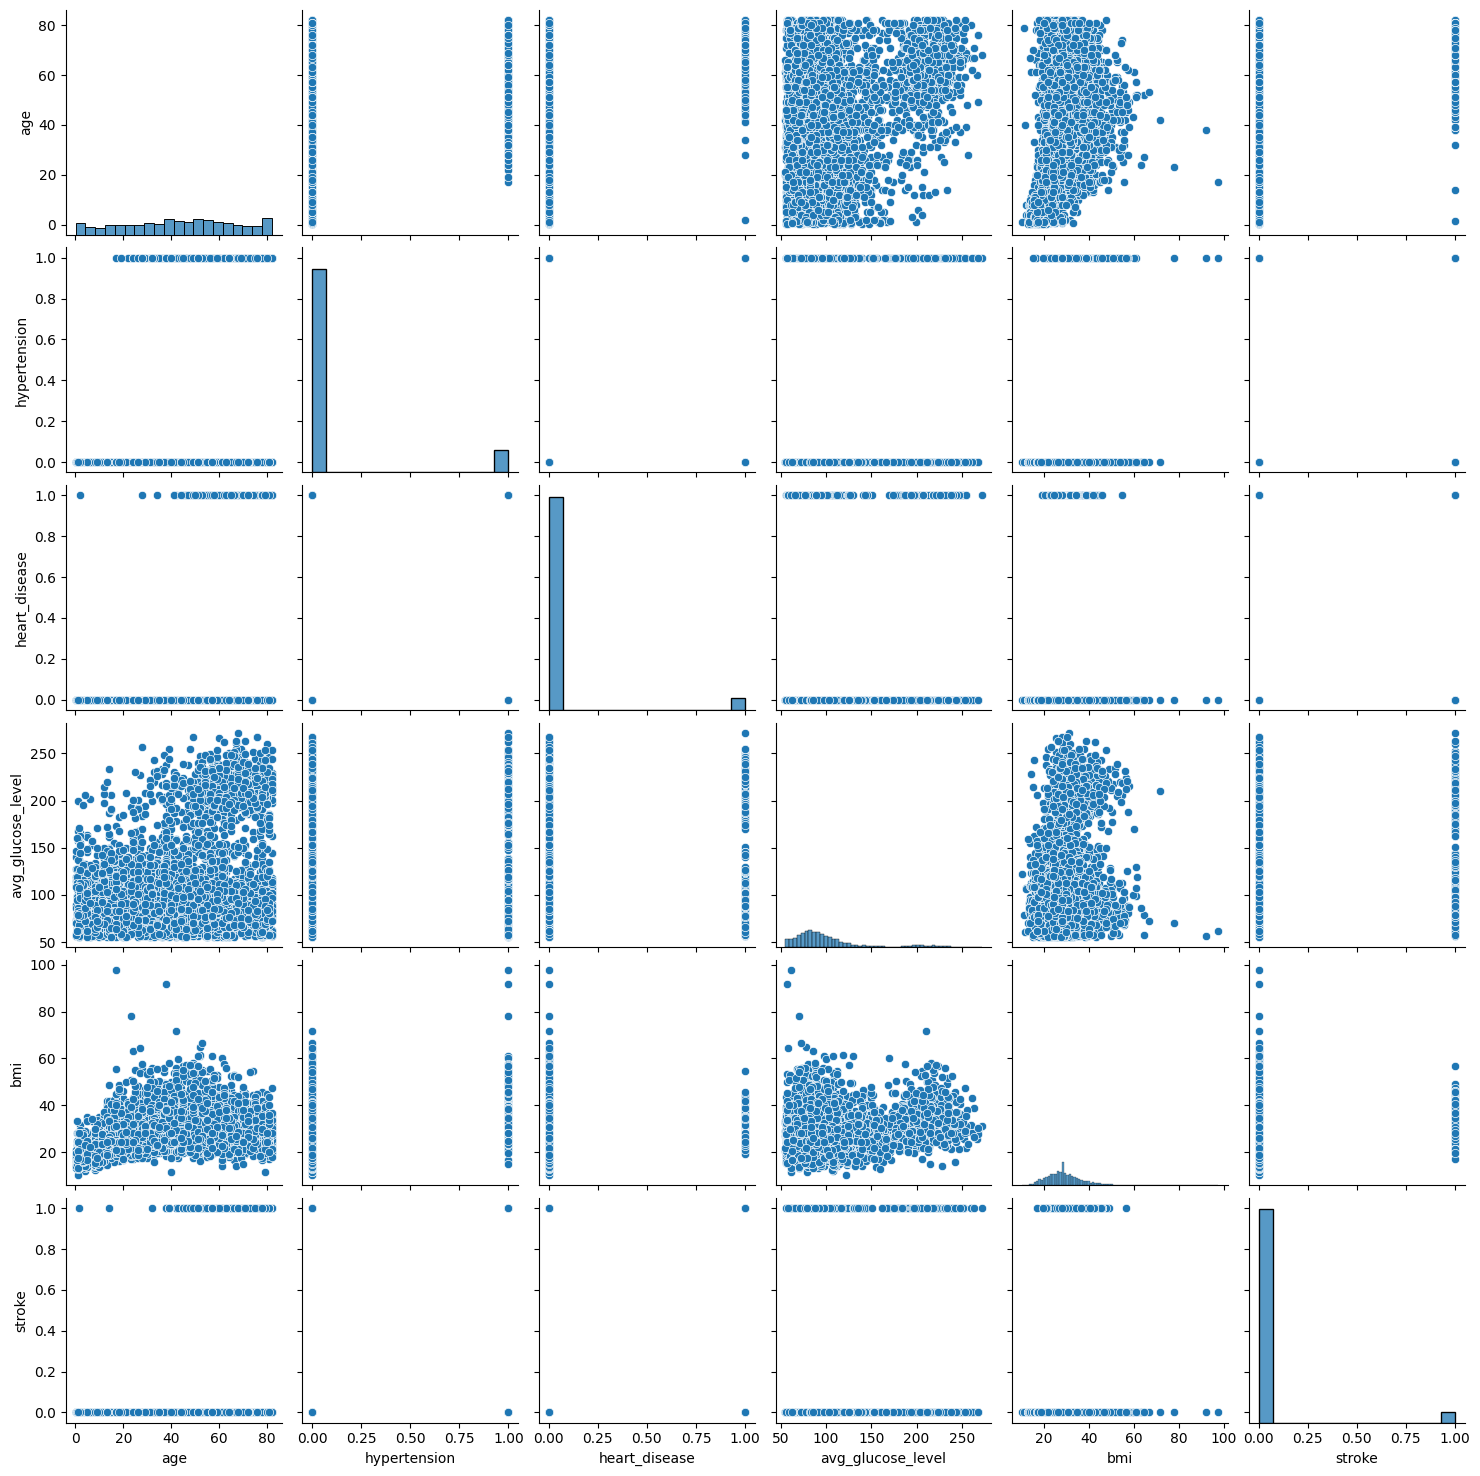

In [20]:
sns.pairplot(numerical_df)
plt.show()

In [21]:
### checking categorical features

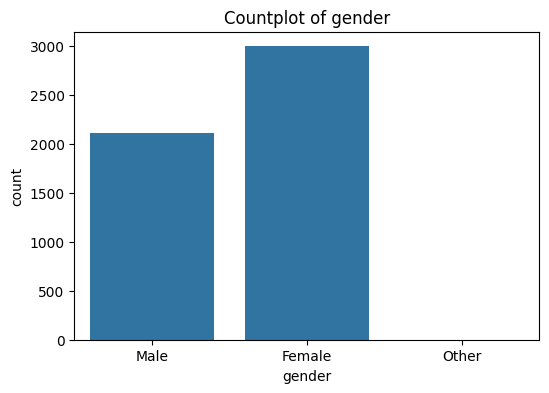

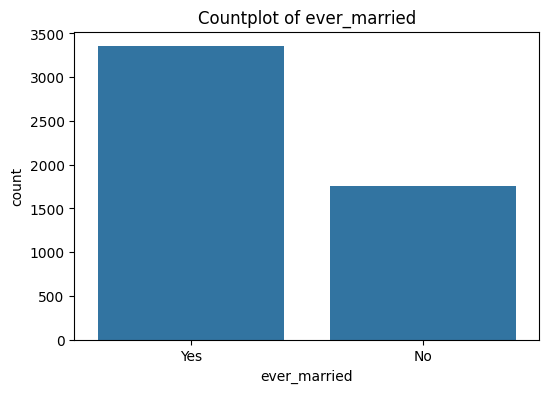

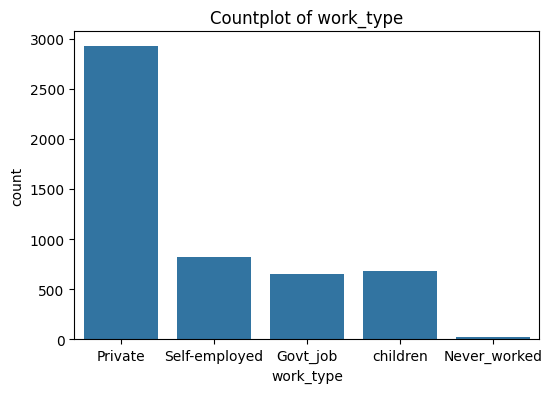

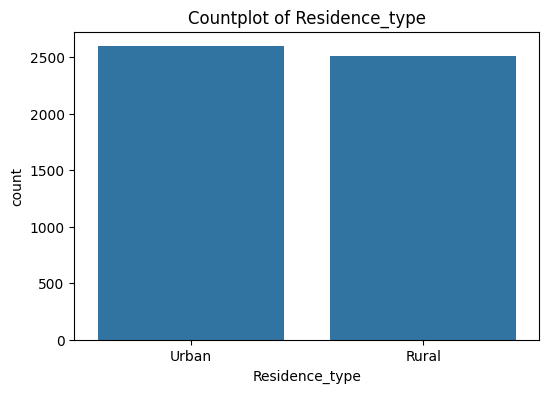

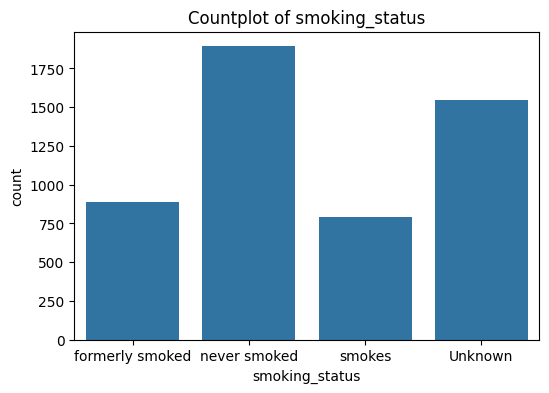

In [22]:
for col in categorical_df.columns:
  plt.figure(figsize=(6,4))
  sns.countplot(x=categorical_df[col])
  plt.title(f"Countplot of {col}")
  plt.show()

In [23]:
### pie charts

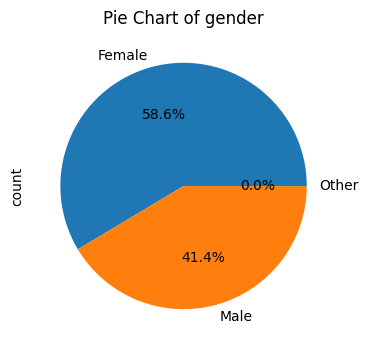

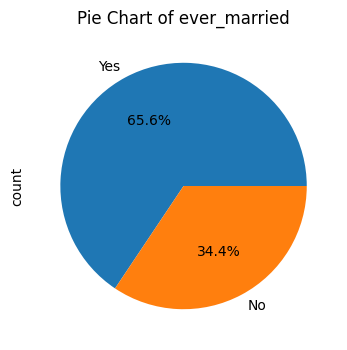

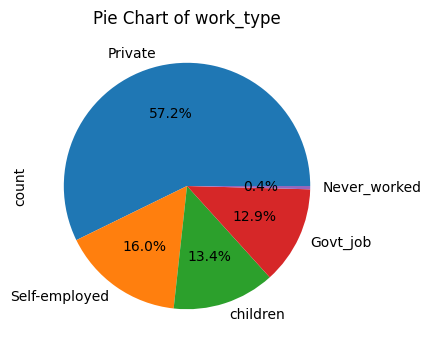

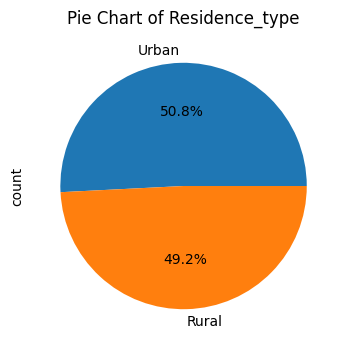

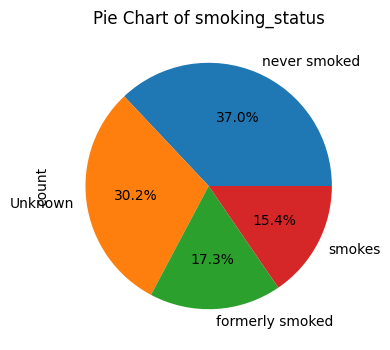

In [24]:
for col in categorical_df.columns:
  plt.figure(figsize=(6,4))
  categorical_df[col].value_counts().plot(kind='pie',autopct='%1.1f%%')
  plt.title(f"Pie Chart of {col}")
  plt.show()

In [25]:
### Cross analysis betwween catgorical and numerical columns

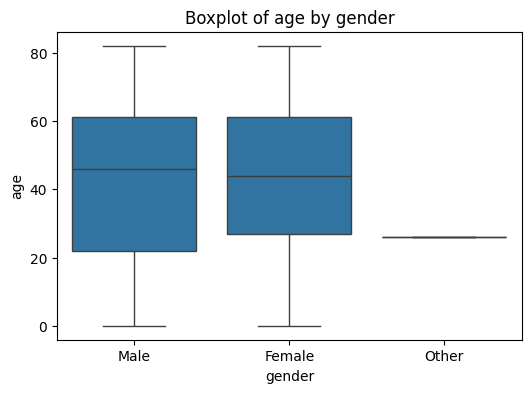

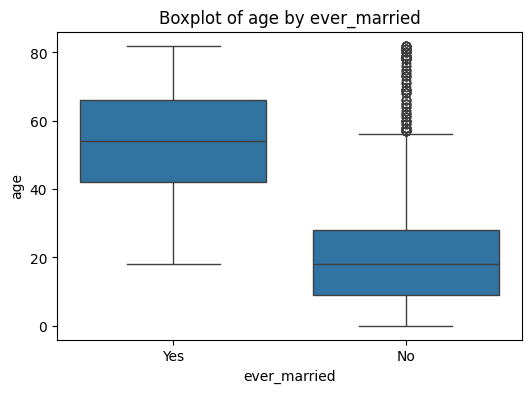

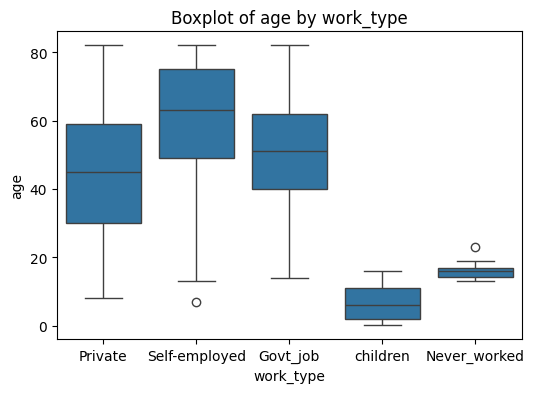

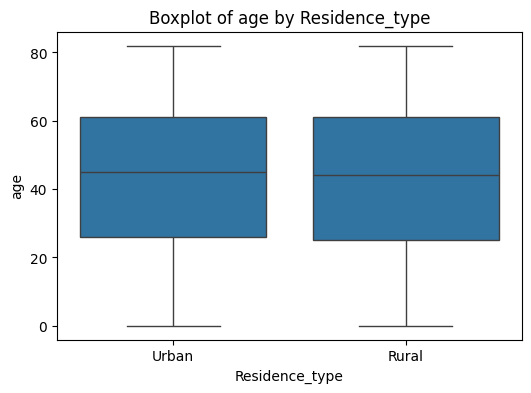

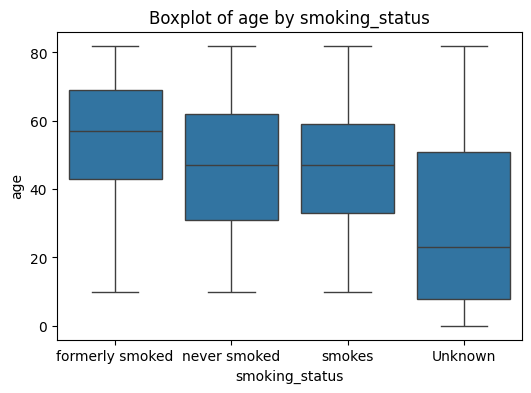

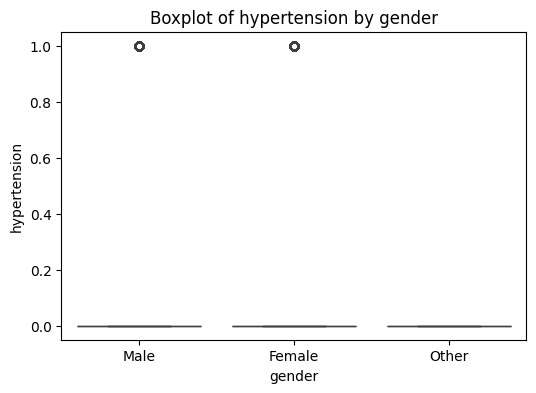

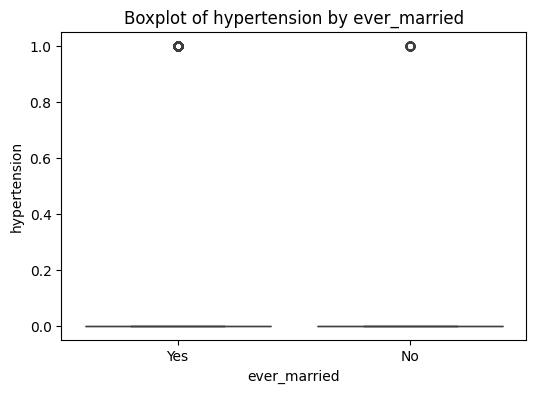

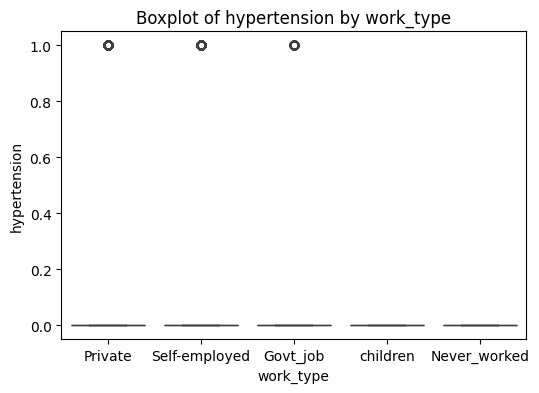

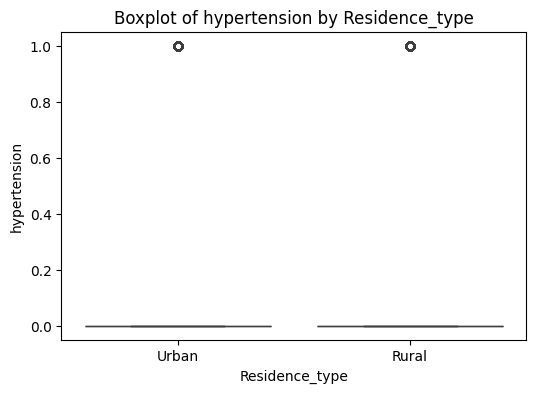

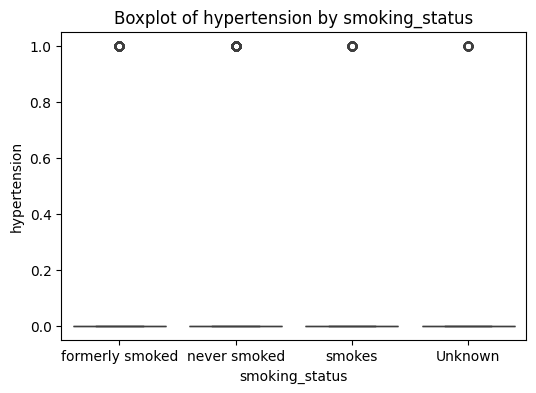

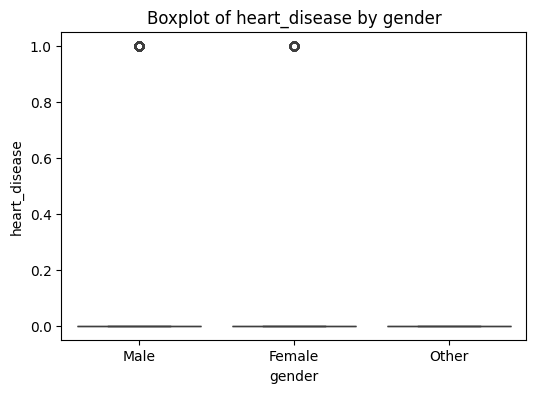

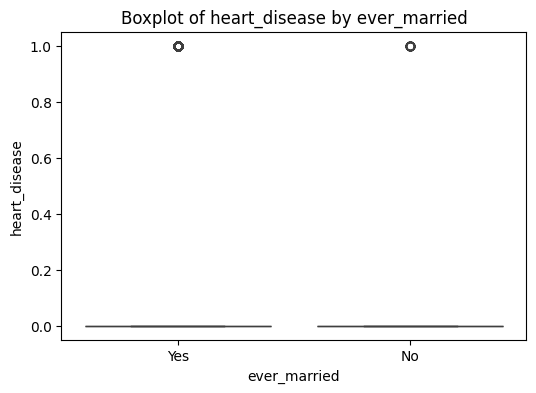

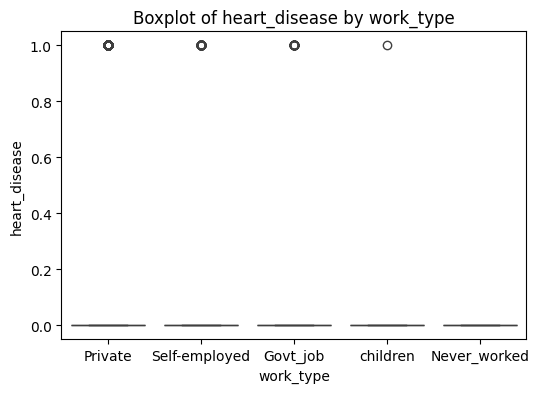

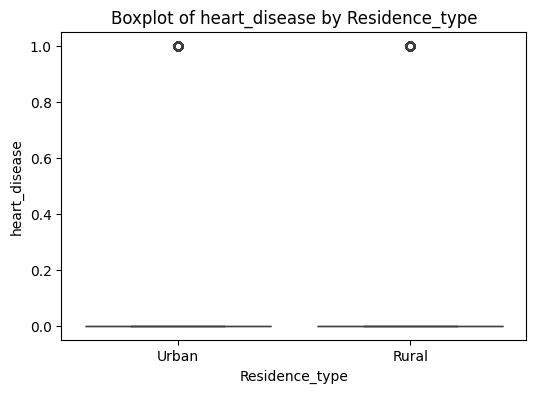

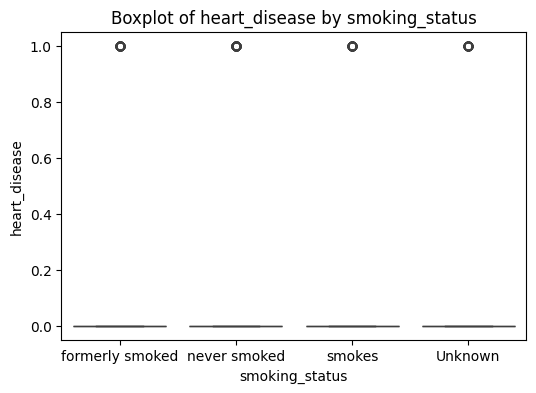

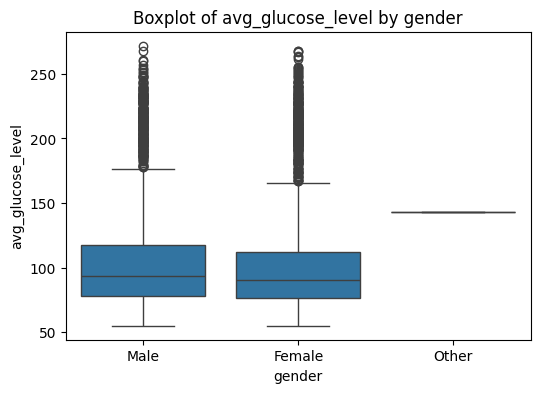

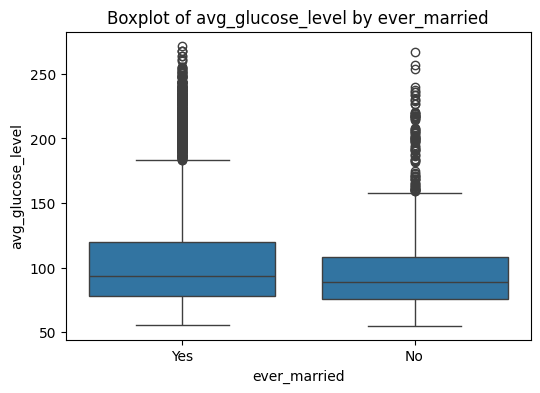

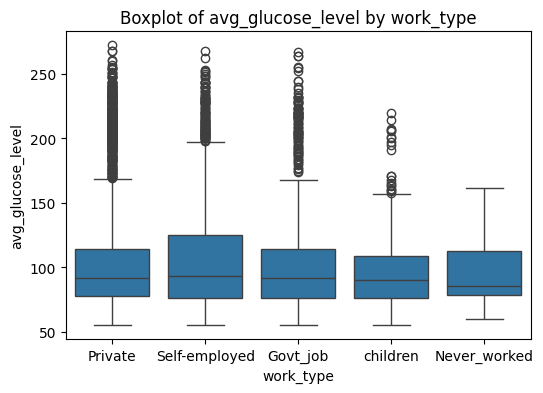

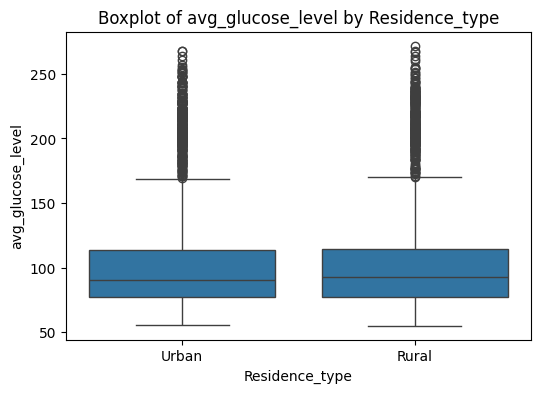

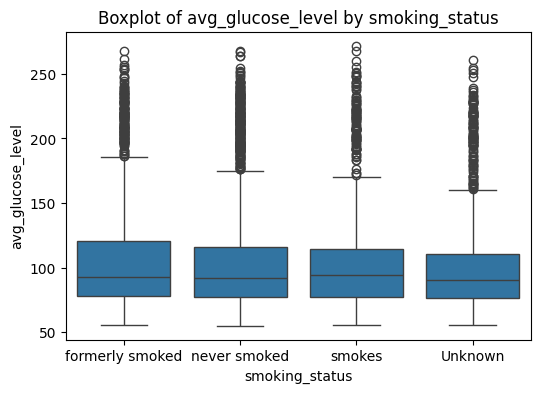

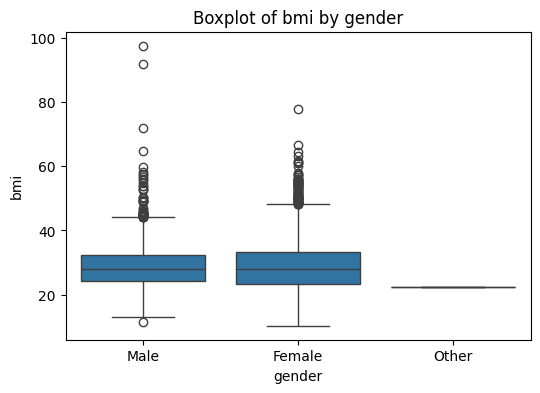

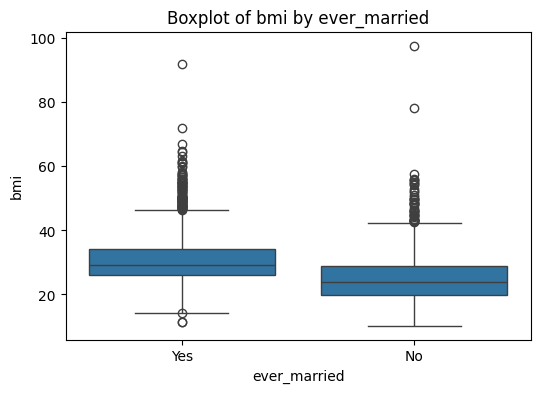

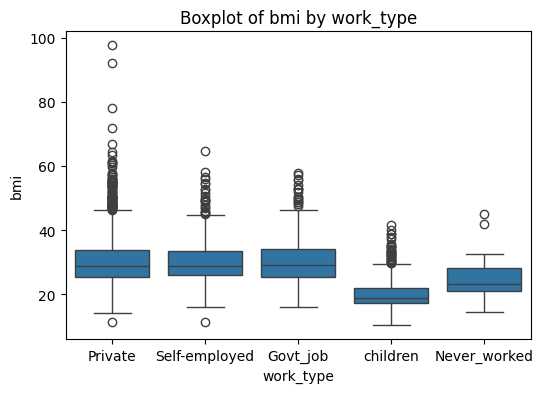

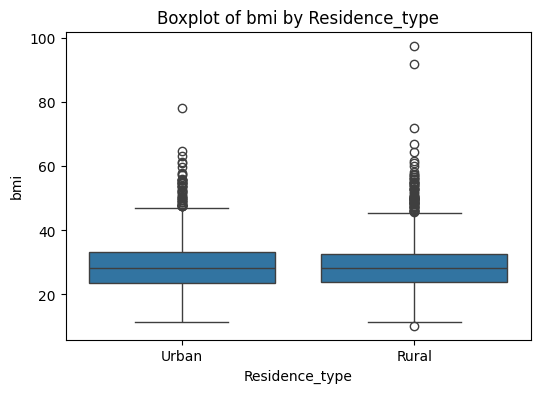

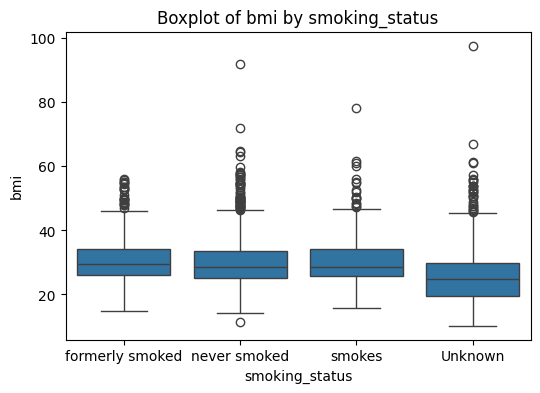

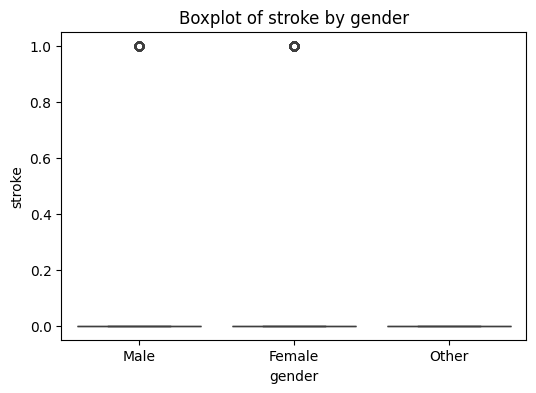

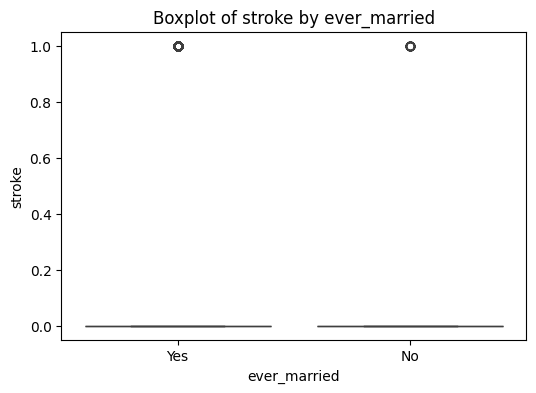

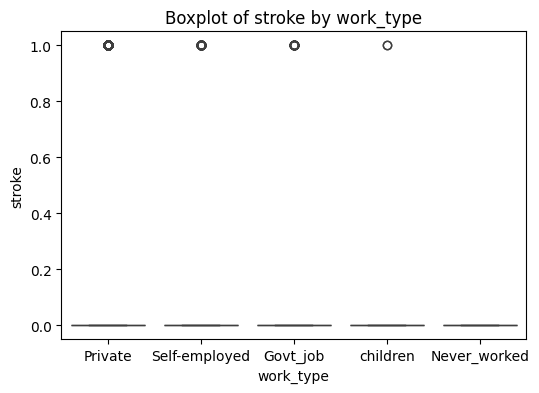

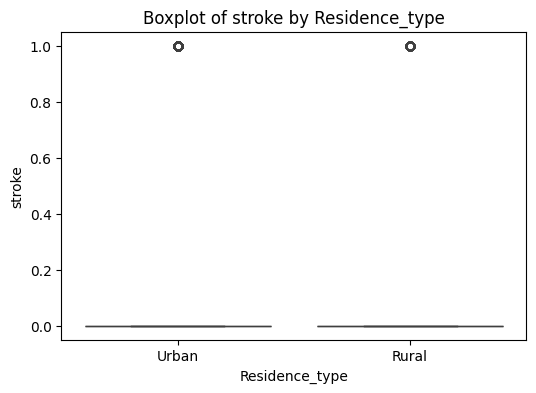

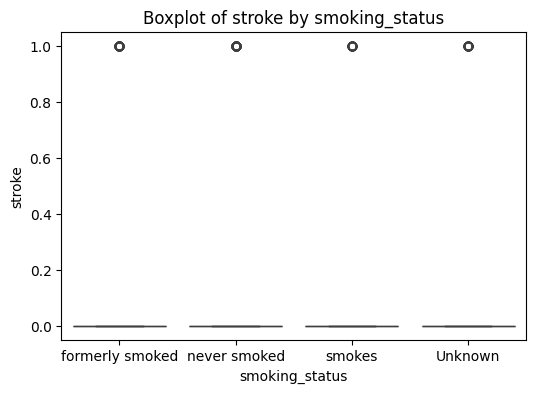

In [26]:
for col in numerical_df.columns:
  for cat_col in categorical_df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=categorical_df[cat_col],y=numerical_df[col])
    plt.title(f"Boxplot of {col} by {cat_col}")
    plt.show()

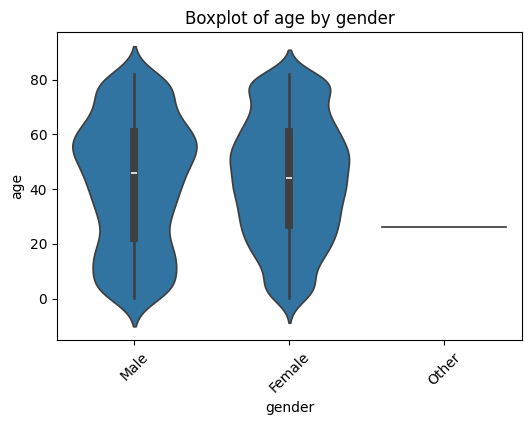

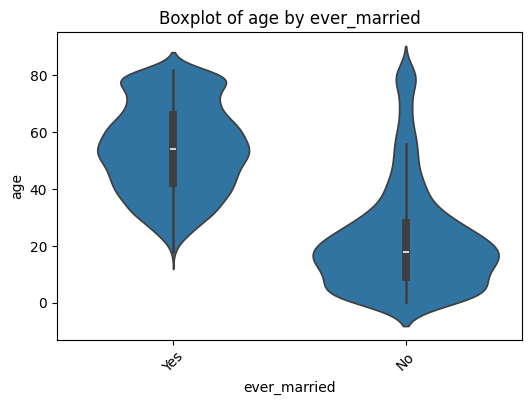

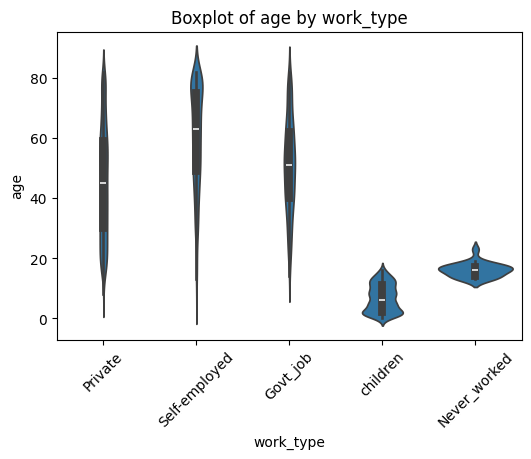

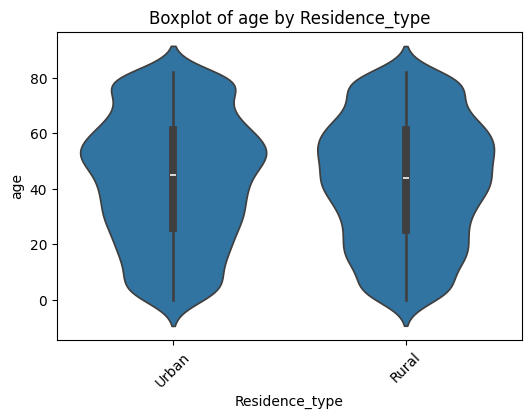

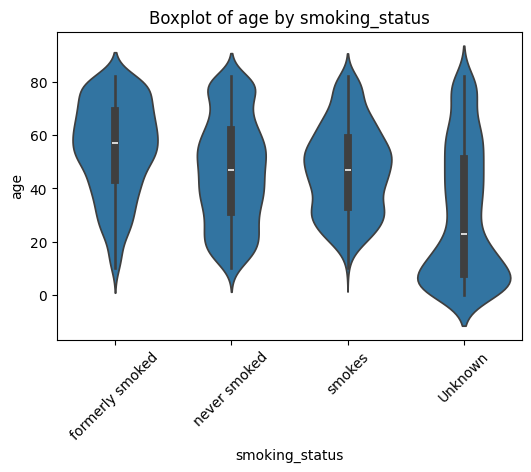

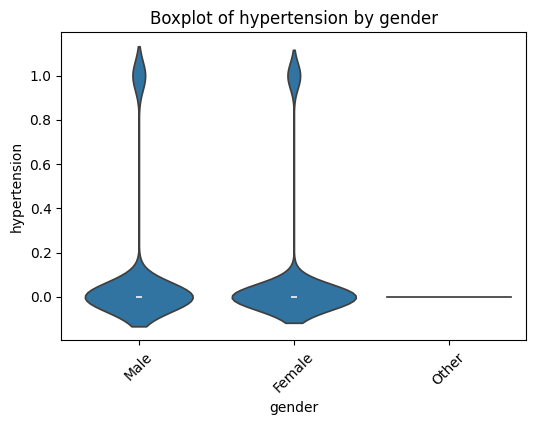

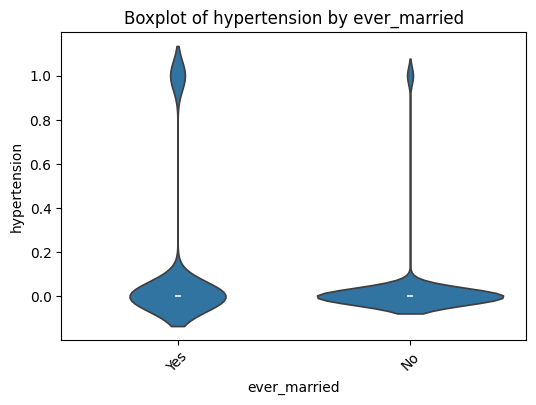

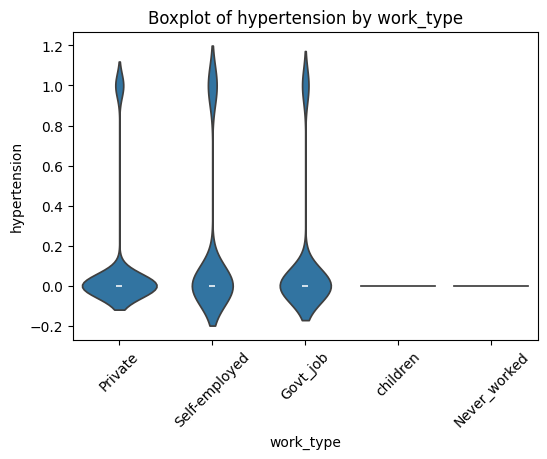

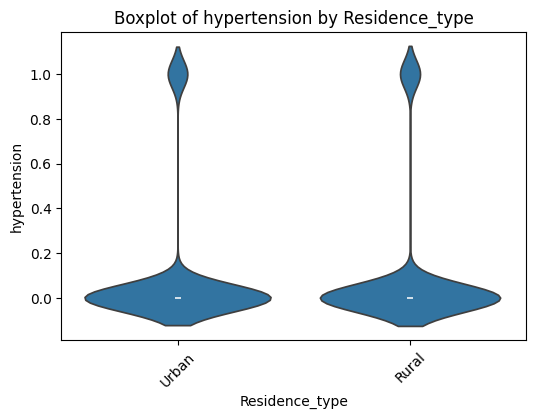

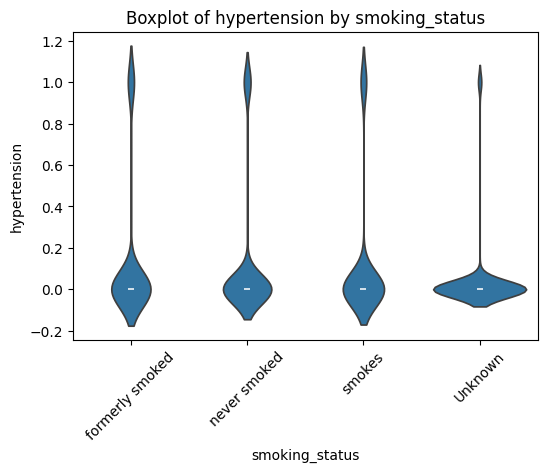

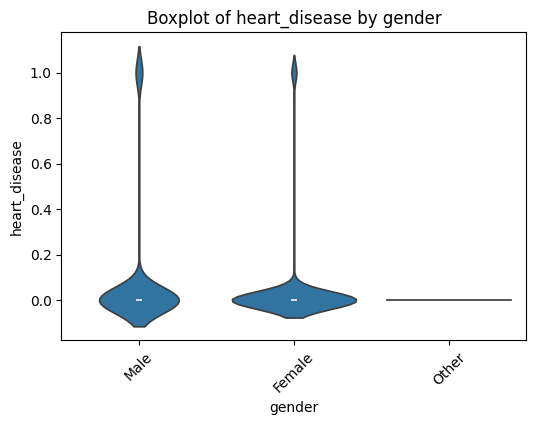

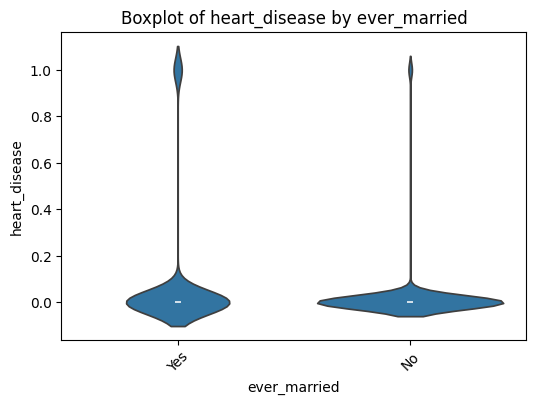

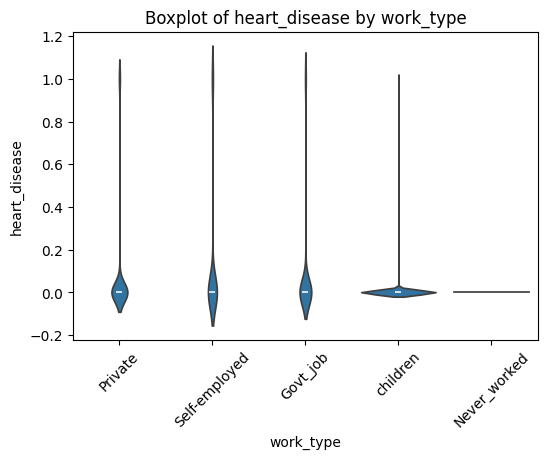

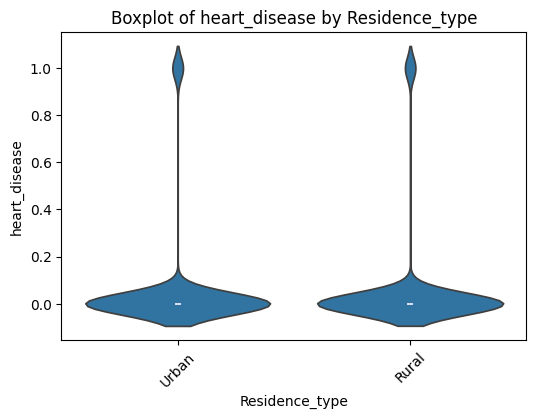

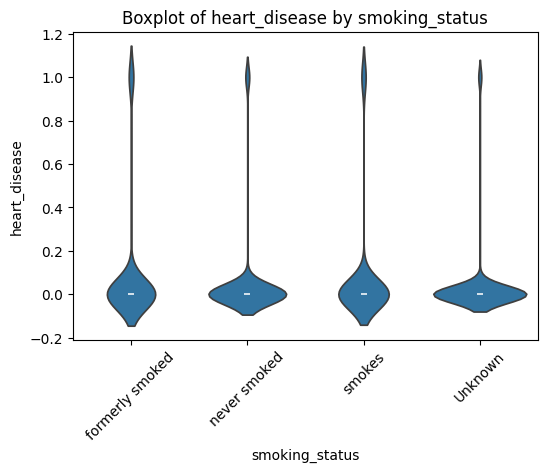

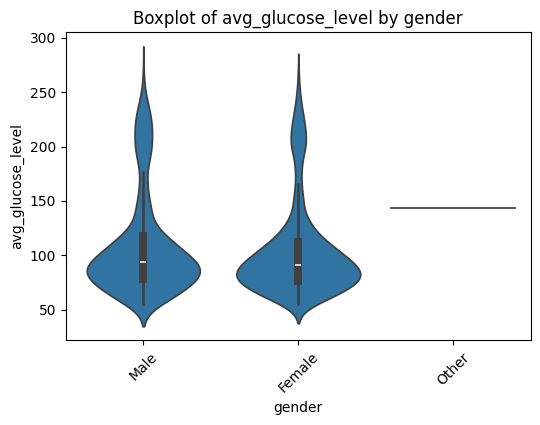

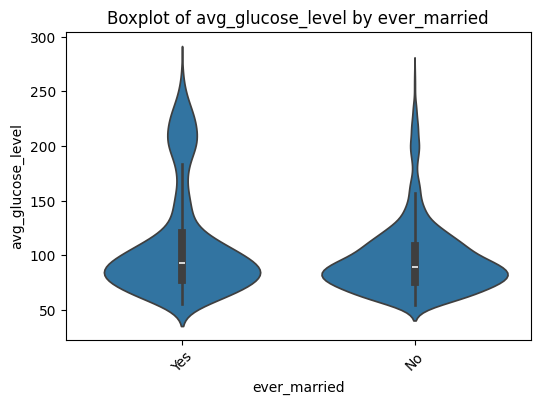

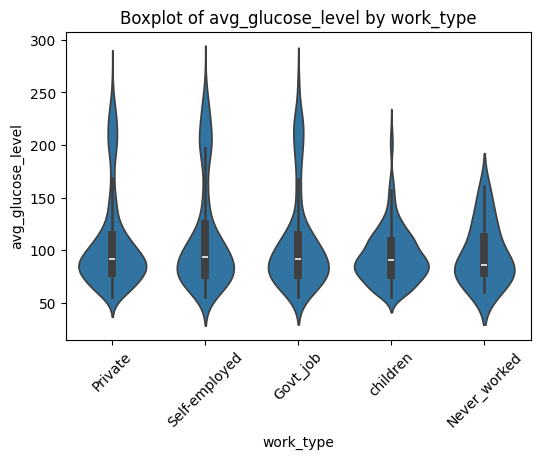

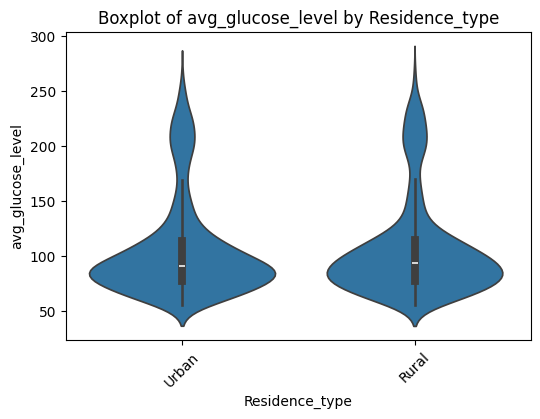

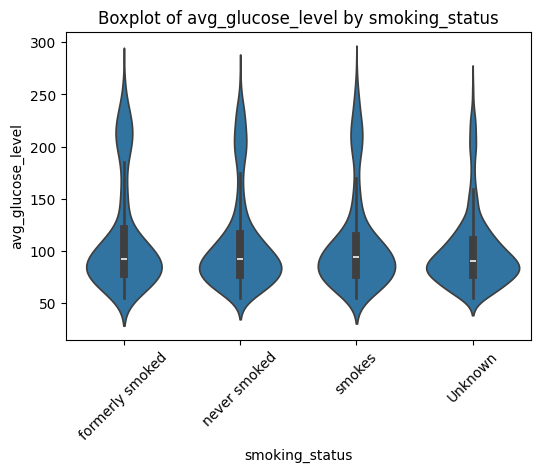

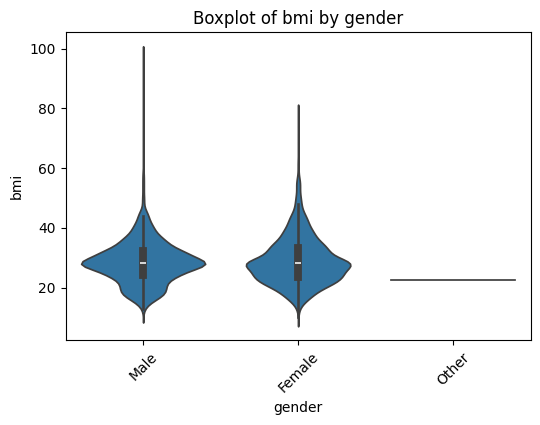

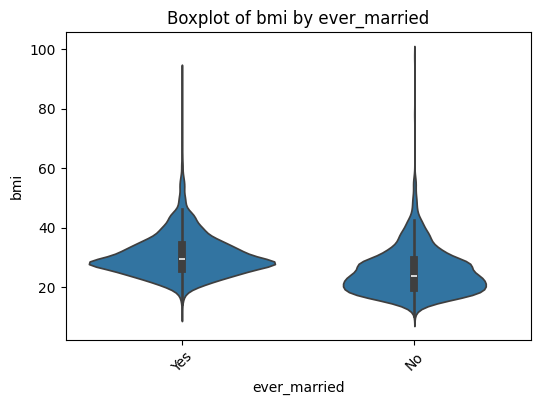

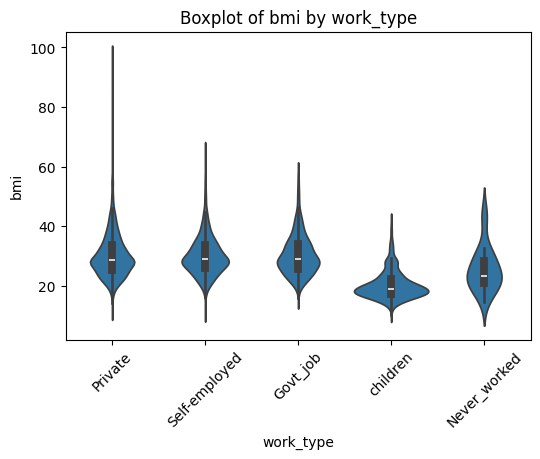

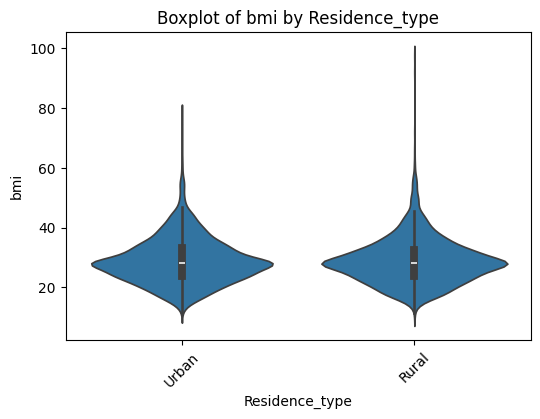

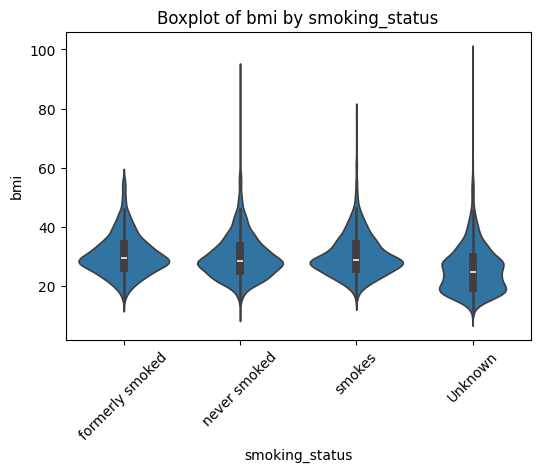

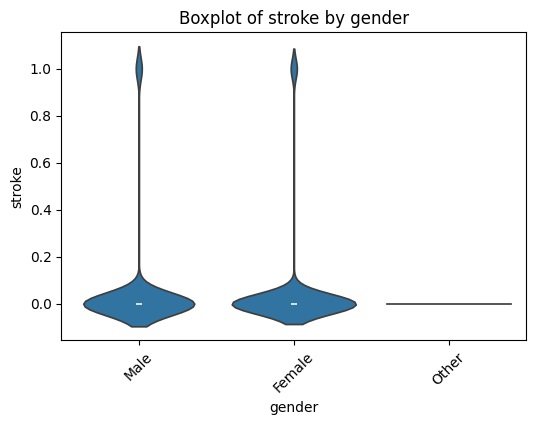

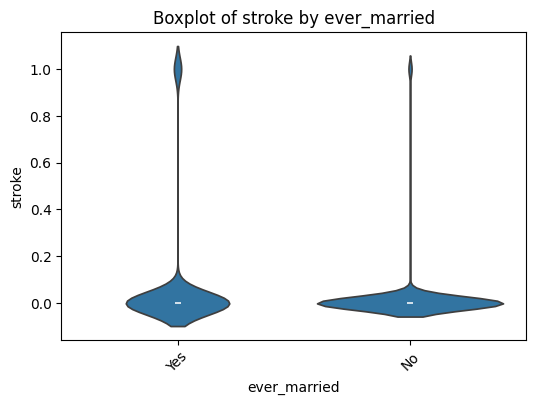

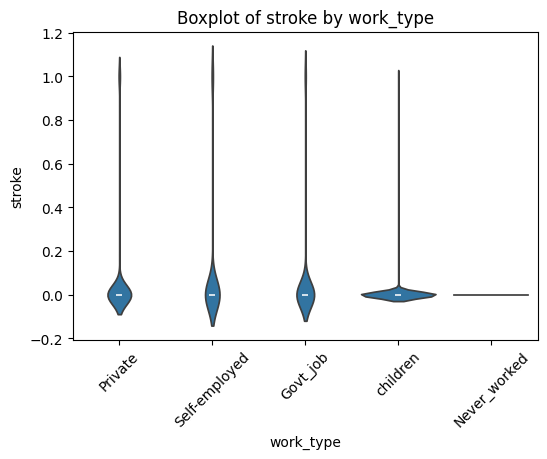

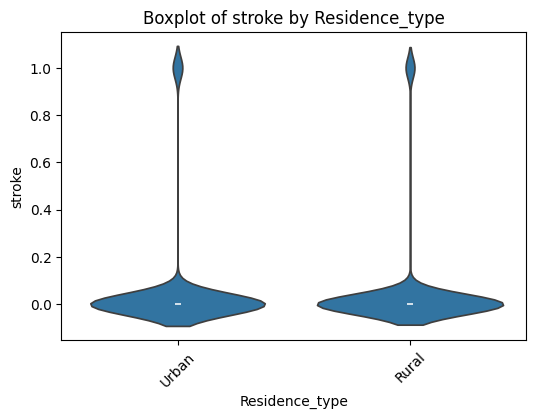

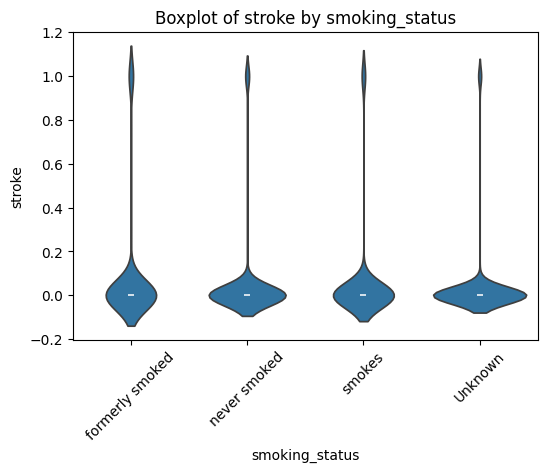

In [27]:
for num_col in numerical_df.columns:
  for cat_col in categorical_df.columns:
    plt.figure(figsize=(6,4))
    sns.violinplot(x=categorical_df[cat_col],y=numerical_df[num_col])
    plt.title(f"Boxplot of {num_col} by {cat_col}")
    plt.xticks(rotation=45)
    plt.show()

In [28]:
## Encoding to categorical features

In [29]:
ordinal_mapping = {'never smoked': 0,'formerly smoked': 1, 'smokes': 2,'Unknown':0}
Data['smoking_status'] = Data['smoking_status'].map(ordinal_mapping)

ordinal_mapping1 = {'Never_worked': 0, 'children': 1, 'Private': 2,'Govt_job':3,'Self-employed':4}
Data['work_type'] = Data['work_type'].map(ordinal_mapping1)



In [30]:
ordinal_mapping2 = {'other': 0, 'Female': 1, 'Male': 2}
Data['gender'] = Data['gender'].map(ordinal_mapping2)

In [31]:
ordinal_mapping3 = {'No':0,'Yes':1}
Data['ever_married'] = Data['ever_married'] .map(ordinal_mapping3)

In [32]:
Data.drop('Residence_type',axis=1,inplace=True)

In [33]:
Data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,2.0,67.0,0,1,1,2,228.69,36.6,1,1
1,1.0,61.0,0,0,1,4,202.21,28.1,0,1
2,2.0,80.0,0,1,1,2,105.92,32.5,0,1
3,1.0,49.0,0,0,1,2,171.23,34.4,2,1
4,1.0,79.0,1,0,1,4,174.12,24.0,0,1
5,2.0,81.0,0,0,1,2,186.21,29.0,1,1
6,2.0,74.0,1,1,1,2,70.09,27.4,0,1
7,1.0,69.0,0,0,0,2,94.39,22.8,0,1
8,1.0,59.0,0,0,1,2,76.15,28.1,0,1
9,1.0,78.0,0,0,1,2,58.57,24.2,0,1


In [34]:
### Feature Correlation Analysis

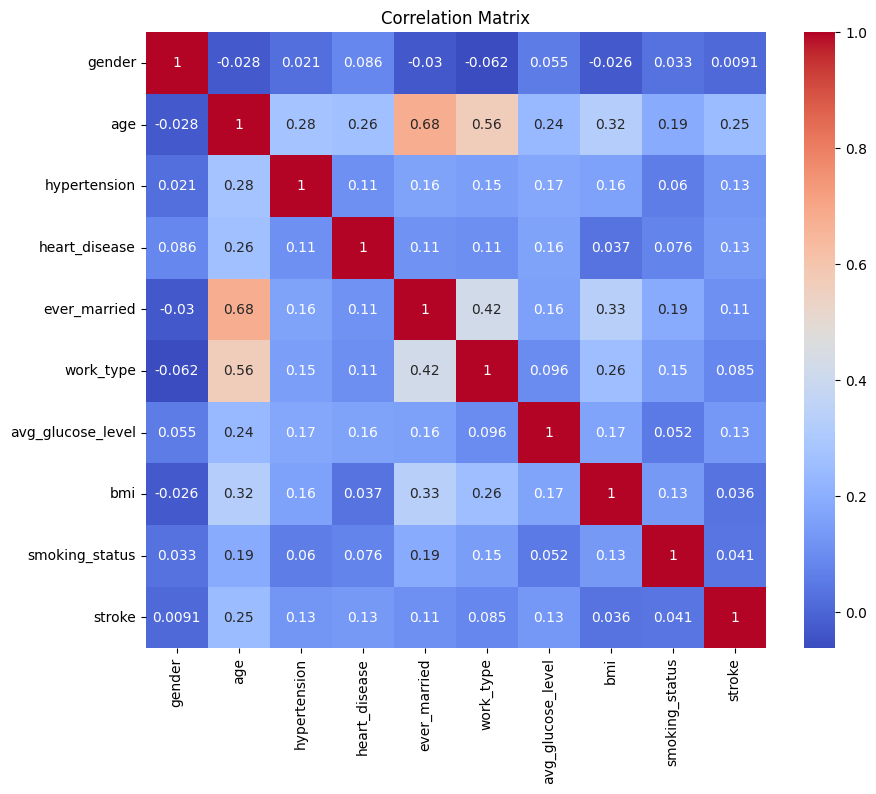

In [35]:
Correlation_matrix=Data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(Correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [36]:
### Based on the correlation matrix gender feature very low correlation with stroke. it can be removed.

In [37]:
Data.drop('gender',axis=1,inplace=True)

In [38]:
Data.shape

(5110, 9)

In [39]:
## Feature Transformation

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [41]:
x=Data.drop('stroke',axis=1)
y=Data['stroke']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [43]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4088, 8)
(4088,)
(1022, 8)
(1022,)


In [44]:
## Scaling the data

In [45]:
scaler=StandardScaler()

In [46]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [47]:
## Checking mass balance data


In [48]:
y_test.value_counts()

,count
stroke,
0,972
1,50


In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
smote=SMOTE(random_state=42)

In [51]:
x_train_resampled,y_train_resampled=smote.fit_resample(x_train_scaled,y_train)

In [52]:
print(x_train_resampled.shape)
print(y_train_resampled.shape)
y_train_resampled.value_counts()

(7778, 8)
(7778,)


,count
stroke,
0,3889
1,3889


**Implementing the Multible ML Algorithems**

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
xgboost=XGBClassifier()
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import roc_curve, auc

In [54]:
le=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
xgboost=XGBClassifier()
svm=SVC()

In [55]:
le.fit(x_train_resampled, y_train_resampled)
dt.fit(x_train_resampled, y_train_resampled)
rf.fit(x_train_resampled, y_train_resampled)
knn.fit(x_train_resampled, y_train_resampled)
xgboost.fit(x_train_resampled, y_train_resampled)
svm.fit(x_train_resampled, y_train_resampled)

SVC()

In [56]:
y_pred_le = le.predict(x_test_scaled)
y_pred_dt = dt.predict(x_test_scaled)
y_pred_rf = rf.predict(x_test_scaled)
y_pred_knn = knn.predict(x_test_scaled)
y_pred_xgb = xgboost.predict(x_test_scaled)
y_pred_svm = svm.predict(x_test_scaled)




In [57]:
print('---'*30)
print("Logistic Regression Accuracy: ",accuracy_score(y_test, y_pred_le))
print(classification_report(y_test, y_pred_le))
print('---'*30)
print("Decision Tree Accuracy: ",accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print('---'*30)
print("Random Forest Accuracy: ",accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print('---'*30)
print("KNN Accuracy: ",accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print('---'*30)
print("XGBoost Accuracy: ",accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print('---'*30)
print("SVM Accuracy: ",accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print('---'*30)


------------------------------------------------------------------------------------------
Logistic Regression Accuracy:  0.7495107632093934
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.77      0.54      1022
weighted avg       0.94      0.75      0.82      1022

------------------------------------------------------------------------------------------
Decision Tree Accuracy:  0.8698630136986302
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       972
           1       0.10      0.20      0.13        50

    accuracy                           0.87      1022
   macro avg       0.53      0.55      0.53      1022
weighted avg       0.91      0.87      0.89      1022

----------------------------------------------------------------------

In [58]:
### Cross validation

In [59]:
from sklearn.model_selection import cross_val_score, cross_validate

In [60]:
cs=cross_val_score(xgboost,x_train_resampled,y_train_resampled,cv=5)
print(cs)
print(cs.mean())

[0.89395887 0.95501285 0.95951157 0.95755627 0.9607717 ]
0.9453622529529919


In [61]:
confusion_matrix=confusion_matrix(y_test,y_pred_xgb)
print(confusion_matrix)

[[922  50]
 [ 41   9]]


**Hyperparameter Tuning implemented to improve False Negative values**


In [62]:
import numpy as np

In [63]:
param_dist={
    'learning_rate':np.linspace(0.01,0.2,10),
    'n_estimators':[50,100,200,500],
    'max_depth':[3,5,7,10],
    'gamma':[0,0.1,0.2],
    'scale_pos_weight': [1, 2, 5]
}
from sklearn.metrics import make_scorer, recall_score, accuracy_score, f1_score



In [64]:
xgb=XGBClassifier()

In [65]:
random_search=RandomizedSearchCV(estimator=xgb,param_distributions=param_dist,
                                 scoring=f1_score,
                                 n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=-1)


In [66]:
random_search.fit(x_train_resampled,y_train_resampled)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 0.2],
                                        'learning_rate': array([0.01      , 0.03111111, 0.05222222, 0.07333333, 0.09444444,
       0.11555556, 0.13666667, 0.15777778, 0.17888889, 0.2       ]),
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'scale_pos_weight': [1, 2, 5]},
                   random_state=42,
                   scoring=<function f1_score at 0x7a6debb8a3b0>, verbose=2)

In [67]:
print(random_search.best_params_)

{'scale_pos_weight': 2, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.07333333333333333, 'gamma': 0.2}


In [68]:
best_xgb_model = random_search.best_estimator_

In [69]:
final_Predication=best_xgb_model.predict(x_test_scaled)

In [70]:
print(f'xgboost:',accuracy_score(y_test,final_Predication))
print(classification_report(y_test,final_Predication))

xgboost: 0.8688845401174168
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       972
           1       0.14      0.32      0.19        50

    accuracy                           0.87      1022
   macro avg       0.55      0.61      0.56      1022
weighted avg       0.92      0.87      0.89      1022



In [73]:
final_confusion_matrix=confusion_matrix(y_test,final_Predication)
print(final_confusion_matrix)

[[872 100]
 [ 34  16]]


In [75]:
### Finally the result has been improved.

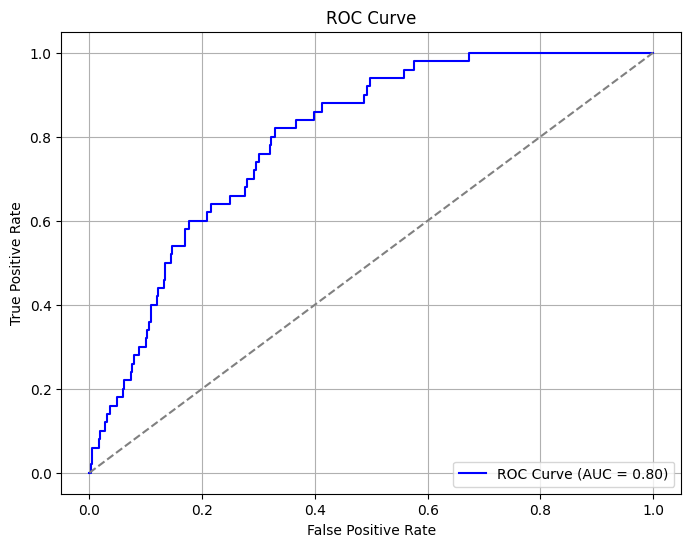

In [74]:
from sklearn.metrics import roc_curve, roc_auc_score


# Predict probabilities
y_prob=best_xgb_model.predict_proba(x_test_scaled)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [76]:
import joblib

In [77]:
joblib.dump(final_Predication, '/content/drive/MyDrive/ML_PROJECT/final_predication.joblib')

['/content/drive/MyDrive/ML_PROJECT/final_predication.joblib']

In [78]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.11).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [79]:


# Configure git username and email
!git config --global user.name "SathishDuraisamy0"
!git config --global user.email "sathishsanker7@gmail.com"

# Verify the configuration
!git config --global --list


user.name=SathishDuraisamy0
user.email=sathishsanker7@gmail.com
